In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

## Data Cleaning

In [2]:
#Load the datset of Ticket info
df=pd.read_csv('datasets/ticket_info_dataset.csv')

In [3]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Payment Method,Type of Ticket,Price,Train ID
0,be826c41-d24e-4086-8550,2024-01-02,10:51:36,Debit Card,Off-Peak,3.0,TWV9R
1,d39e2f33-7d0b-41d9-a602,2024-03-05,09:51:11,Credit Card,Off-Peak,54.0,E0HAX
2,NaN,2024-03-07,20:28:14,Contactless,Advance,13.0,FI6Q4
3,c9ca437d-cd8b-44b2-ad79,2024-04-17,19:36:37,Credit Card,Advance,3.0,7AG6N
4,c5babed3-aa34-42de-8477,2024-03-16,20:29:48,Contactless,Advance,3.0,LUAZX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38749 entries, 0 to 38748
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    36833 non-null  object 
 1   Date of Purchase  36813 non-null  object 
 2   Time of Purchase  38749 non-null  object 
 3   Payment Method    38749 non-null  object 
 4   Type of Ticket    36814 non-null  object 
 5   Price             38749 non-null  float64
 6   Train ID          38749 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.1+ MB


In [5]:
print(f"Num of rows: {df.shape[0]}\nnum of columns: {df.shape[1]}")
print('-------------')

print(f'Num of Null values \n{df.isna().sum()}')
print('-------------')

print(f'Num of dupluicated values {df.duplicated().sum()}')

Num of rows: 38749
num of columns: 7
-------------
Num of Null values 
Transaction ID      1916
Date of Purchase    1936
Time of Purchase       0
Payment Method         0
Type of Ticket      1935
Price                  0
Train ID               0
dtype: int64
-------------
Num of dupluicated values 6458


In [6]:
df['Price'].describe()

count      38749.000000
mean         -20.491398
std        25006.469295
min     -1000000.000000
25%            5.000000
50%           11.000000
75%           35.000000
max      1000000.000000
Name: Price, dtype: float64

In [7]:
#drop duplicates from dataset
df.drop_duplicates(inplace=True)
print(f'Num of duplicates in Dataset: {df.duplicated().sum()}')

Num of duplicates in Dataset: 0


In [8]:
#drop values with null in transaction id 
df = df.dropna(subset=['Transaction ID','Date of Purchase'])

print(f'Num of null values in dataset: \n{df.isna().sum()}')

Num of null values in dataset: 
Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Payment Method         0
Type of Ticket      1457
Price                  0
Train ID               0
dtype: int64


In [9]:
#convert date to string
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'],format='%Y-%m-%d')


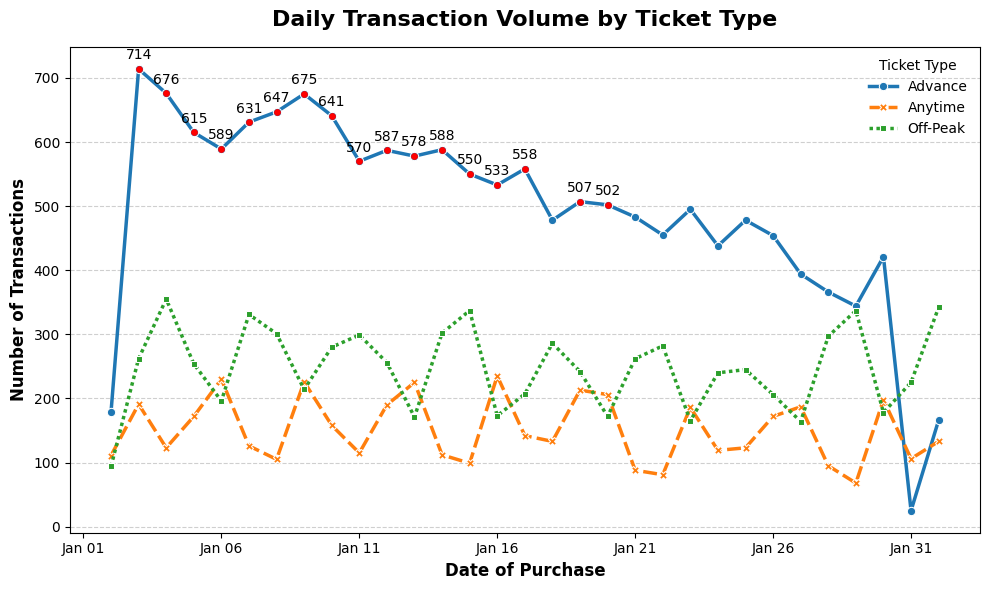

In [10]:
#Calculate NUm of Transaction per Day
day_distr = df.groupby(by=[df['Date of Purchase'].dt.day,'Type of Ticket'])['Transaction ID'].count().reset_index()


plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=day_distr,
    x='Date of Purchase',
    y='Transaction ID',
    hue='Type of Ticket',
    style='Type of Ticket',
    markers=True,
    palette='tab10',
    linewidth=2.5
)

#highlight point upper 500
for i,row in day_distr.iterrows():
    if row['Transaction ID'] > 500:
        # Color the points exceeding 500
        ax.scatter(
            row['Date of Purchase'], 
            row['Transaction ID'], 
            color='red', 
            s=15, 
            zorder=4
        ),
        # Add Text to each point
        ax.text(
            row['Date of Purchase'], 
            row['Transaction ID'] + 15,  
            f"{row['Transaction ID']}", 
            fontsize=10, 
            ha='center', 
            color='black'
        )
        
        
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.title('Daily Transaction Volume by Ticket Type', fontsize=16, weight='bold', pad=15)
plt.xlabel('Date of Purchase', fontsize=12, weight='bold')
plt.ylabel('Number of Transactions', fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.move_legend(ax, "upper right", title='Ticket Type', frameon=False)

plt.tight_layout()
plt.show()

In [11]:
# fill nan values
df['Type of Ticket'].fillna(method='ffill',inplace=True)

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_43083/3150368058.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type of Ticket'].fillna(method='ffill',inplace=True)
/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_43083/3150368058.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Type of Ticket'].fillna(method='ffill',inplace=True)


/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_43083/4154722132.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


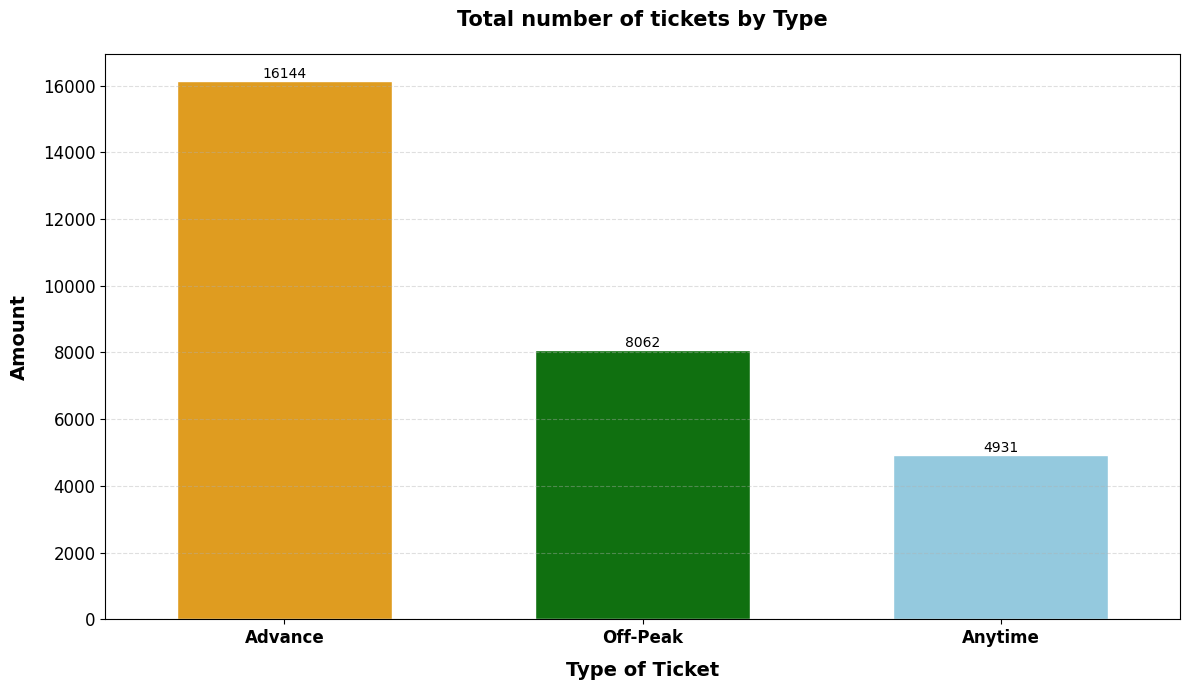

In [12]:
#Quantity of Type of Tickets
num_of_type_tickets = df['Type of Ticket'].value_counts().reset_index()

color_pallete ={'Advance':'orange',
                'Anytime':'skyblue',
                'Off-Peak':'green'}

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=num_of_type_tickets,
    x='Type of Ticket',
    y='count',
    palette=color_pallete,
    edgecolor='white',
    width=0.6
)
for bar in ax.containers:
    ax.bar_label(bar,
                 fmt='%d',
                 label_type='edge',
                 fontsize=10)

plt.title('Total number of tickets by Type',fontsize=15,weight='bold',pad=20)
plt.xlabel('Type of Ticket', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Amount', fontsize=14, weight='bold', labelpad=10)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [13]:
#Some Analytics Calculation
print(f'Average price: {df['Price'].mean()}')
print(f'Maximum price: {df['Price'].max()}')
print(f'Minmum price: {df['Price'].min()}')
print(f'Median  price: {df['Price'].median()}')

Average price: -144.71303104315783
Maximum price: 1000000.0
Minmum price: -1000000.0
Median  price: 11.0


In [14]:
##replace negative price to positive
def positive_price(x):
    if x < 0:
        return abs(x)
    return x

df['Price'] = df['Price'].apply(positive_price)

In [15]:
## find outliers with IQR in Price column
Q1 = df['Price'].quantile(.25)
Q3 = df['Price'].quantile(.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliear = df.loc[(df['Price'] < lower_bound ) | (df['Price'] > upper_bound)]

#Extract outliers from dataset
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# change very low price to mean
df['Price'] = df['Price'].apply(lambda x: 20 if x < 7 else x)

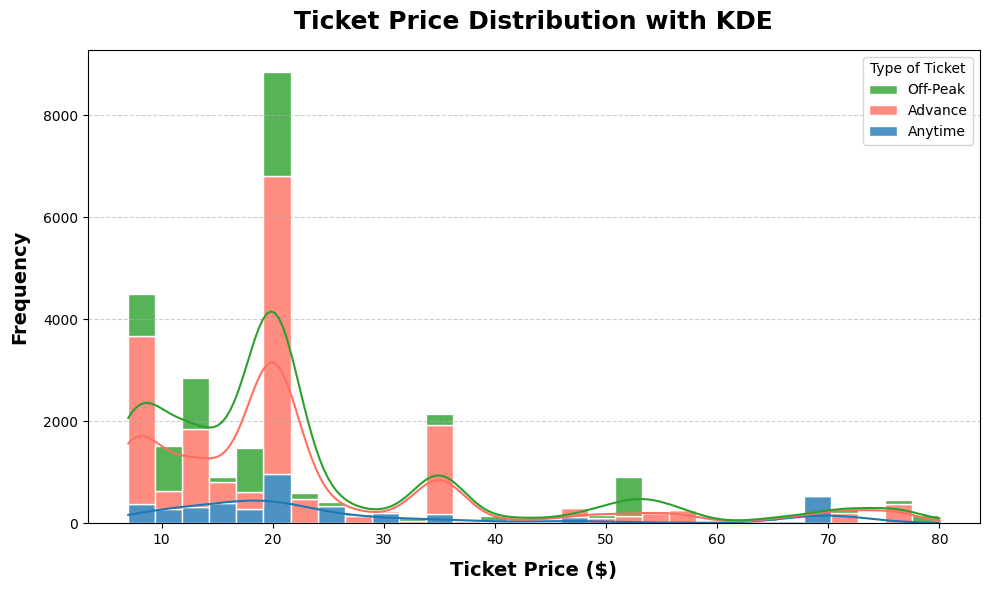

In [16]:
color_palette = {'Advance': '#ff6f61', 'Anytime': '#1f77b4', 'Off-Peak': '#2ca02c'}

plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='Price',
    bins=30,
    kde=True,
    hue='Type of Ticket',
    multiple='stack',
    palette=color_palette,
    edgecolor='white',
    alpha=0.8
)


plt.title("Ticket Price Distribution with KDE", fontsize=18, weight='bold', pad=15)
plt.xlabel("Ticket Price ($)", fontsize=14, weight='bold', labelpad=10)
plt.ylabel("Frequency", fontsize=14, weight='bold', labelpad=10)
plt.grid(axis='y',linestyle='--',alpha=.6)
plt.tight_layout()
plt.show()

In [17]:
df.rename(columns={'Transaction ID':'Transaction_ID',
                   'Date of Purchase':'Date_of_Purchase',
                   'Time of Purchase':'Time_of_Purchase',
                   'Payment Method':'Payment_Method',
                   'Type of Ticket':'Type_of_Ticket',
                   'Train ID':'Train_ID'},inplace=True)

In [18]:
df.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Payment_Method,Type_of_Ticket,Price,Train_ID
0,be826c41-d24e-4086-8550,2024-01-02,10:51:36,Debit Card,Off-Peak,20.0,TWV9R
1,d39e2f33-7d0b-41d9-a602,2024-03-05,09:51:11,Credit Card,Off-Peak,54.0,E0HAX
3,c9ca437d-cd8b-44b2-ad79,2024-04-17,19:36:37,Credit Card,Advance,20.0,7AG6N
4,c5babed3-aa34-42de-8477,2024-03-16,20:29:48,Contactless,Advance,20.0,LUAZX
5,1ff7000a-f0d5-4d83-914d,2024-02-10,09:41:02,Contactless,Advance,13.0,TPGN8


In [19]:
#Num of rows
df.shape

(27654, 7)

## import Dataset to SQL

In [20]:
from sqlalchemy import create_engine

DATABASE = "postgres"
USER = "postgres"
PASSWORD = "1234"
HOST = "localhost"
PORT = "5433"

# create a connect to local Database
engine = create_engine(f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}")
TABLE_NAME = "Tickets_details"
df.to_sql(TABLE_NAME, engine, if_exists="replace", index=False)
print(f"DataFrame was import '{TABLE_NAME}'!")

InternalError: (psycopg2.errors.DependentObjectsStillExist) cannot drop table "Tickets_details" because other objects depend on it
DETAIL:  view customer_purchase_history depends on table "Tickets_details"
view month_revenue depends on table "Tickets_details"
HINT:  Use DROP ... CASCADE to drop the dependent objects too.

[SQL: 
DROP TABLE "Tickets_details"]
(Background on this error at: https://sqlalche.me/e/20/2j85)

In [21]:
df.to_csv('dataset_cleaned/Ticket_cleaned.csv',index=False)